In [1]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
nltk.download("punkt")
nltk.download("wordnet")
nltk.download("wordnet")
import pandas as pd
import warnings
warnings.filterwarnings("ignore")



df = pd.read_csv("C:/ML/python/data/data.csv",delimiter=',')
df.head(10)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\katsa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\katsa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\katsa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
5,$SPY wouldn't be surprised to see a green close,positive
6,Shell's $70 Billion BG Deal Meets Shareholder ...,negative
7,SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANG...,negative
8,Kone 's net sales rose by some 14 % year-on-ye...,positive
9,The Stockmann department store will have a tot...,neutral


In [2]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.isna().sum()

Sentence     0
Sentiment    0
dtype: int64

<Axes: ylabel='count'>

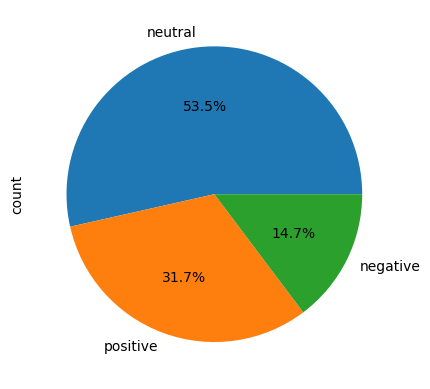

In [3]:
df['Sentiment'].value_counts().plot(kind='pie',autopct="%1.1f%%")

In [4]:
#Cleaning 
PUNC = string.punctuation


def clean_text(text):
    
    
    text = str(text).lower()
    
    text = re.sub(r'<.*?>+', '',text)
    
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    
    text = re.sub(r'\d', '',text)
    text = re.sub('[%s]' % re.escape(PUNC), '',text)
    
    text = re.sub(' +', ' ', text)
    
    text = re.sub(r'esi', '',text)
    text = re.sub(r'afx', '',text)

    text = re.sub(r'bk', '',text)
    
    text = re.sub(r'kci', '',text)

    
    
    return text




df['Sentence'] = df['Sentence'].apply(clean_text)
df['Sentence'].head(10)

0    the geosolutions technology will leverage bene...
1                  on lows down to  a real possibility
2    for the last quarter of componenta s net sales...
3    according to the finnishrussian chamber of com...
4    the swedish buyout firm has sold its remaining...
5        spy wouldnt be surprised to see a green close
6    shells billion bg deal meets shareholder skept...
7    ssh communications security corp stock exchang...
8    kone s net sales rose by some yearonyear in th...
9    the stockmann department store will have a tot...
Name: Sentence, dtype: object

In [5]:
#Removing Contractions
df['Sentence'] = df['Sentence'].str.replace('mn', '')



import contractions

def expand_contractions(text):
    expanded_text = contractions.fix(text)
    return expanded_text


df['Sentence'] = df['Sentence'].apply(expand_contractions)
df['Sentence'].head(10)

0    the geosolutions technology will leverage bene...
1                  on lows down to  a real possibility
2    for the last quarter of componenta s net sales...
3    according to the finnishrussian chamber of com...
4    the swedish buyout firm has sold its remaining...
5      spy would not be surprised to see a green close
6    shells billion bg deal meets shareholder skept...
7    ssh communications security corp stock exchang...
8    kone s net sales rose by some yearonyear in th...
9    the stockmann department store will have a tot...
Name: Sentence, dtype: object

In [6]:
#stopword removal
sw = set(stopwords.words("english"))


def remove_stopwords(text):
    tokens = word_tokenize(text)
    cleaned_tokens = [word for word in tokens if word.lower() not in sw]
    return " ".join(cleaned_tokens)

df['Sentence'] = df['Sentence'].apply(remove_stopwords)
df['Sentence'].head(10)

0    geosolutions technology leverage benefon gps s...
1                                lows real possibility
2    last quarter componenta net sales doubled eurm...
3    according finnishrussian chamber commerce majo...
4    swedish buyout firm sold remaining percent sta...
5                  spy would surprised see green close
6    shells billion bg deal meets shareholder skept...
7    ssh communications security corp stock exchang...
8     kone net sales rose yearonyear first nine months
9    stockmann department store total floor space s...
Name: Sentence, dtype: object

In [7]:
lemma = WordNetLemmatizer()


def lemm_text(text):
    tokens = word_tokenize(text)
    lemma_tokens = [lemma.lemmatize(token) for token in tokens]
    return " ".join(lemma_tokens)



df['Sentence'] = df['Sentence'].apply(lemm_text)
df['Sentence'].head(10)



0    geosolutions technology leverage benefon gps s...
1                                 low real possibility
2    last quarter componenta net sale doubled eurm ...
3    according finnishrussian chamber commerce majo...
4    swedish buyout firm sold remaining percent sta...
5                  spy would surprised see green close
6    shell billion bg deal meet shareholder skepticism
7    ssh communication security corp stock exchange...
8       kone net sale rose yearonyear first nine month
9    stockmann department store total floor space s...
Name: Sentence, dtype: object

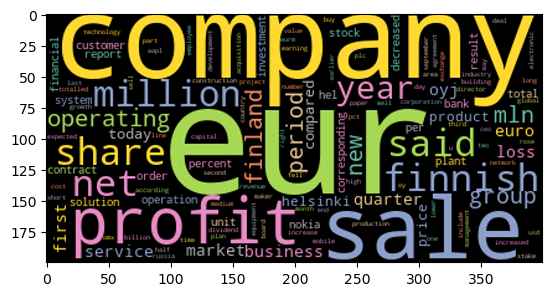

In [8]:
#Wordcloud
from wordcloud import WordCloud
from textblob import TextBlob


text = " ".join(word for word in df['Sentence'])


blob = TextBlob(text)



#wordcloud

wc = WordCloud(colormap='Set2',collocations=False).generate(text)
plt.imshow(wc,interpolation='spline16')
plt.show()

In [9]:
#Train/test split with no keras first
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = df['Sentence']
X = cv.fit_transform(X).toarray()
y = df['Sentiment']
y = y.map({"negative":0,'positive':1,'neutral':2})
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=42)


from sklearn.linear_model import PassiveAggressiveClassifier,LogisticRegression
lr = LogisticRegression()
PA = PassiveAggressiveClassifier()


from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
BNB = BernoulliNB()
GNB = GaussianNB()
MNB = MultinomialNB()

from sklearn.metrics import accuracy_score,classification_report

def evaluate_model(X_train,X_test,y_train,y_test,model):
    model = model.fit(X_train,y_train)
    pred = model.predict(X_test)
    acc = accuracy_score(y_test,pred)
    clf_rpt = classification_report(y_test,pred)
    print(f'{model.__class__.__name__}, --Accuracy-- {acc*100:.2f}%; --Classification Report-- {clf_rpt}')
    return pred


lr_pred = evaluate_model(X_train, X_test, y_train, y_test, lr)
PA_pred = evaluate_model(X_train, X_test, y_train, y_test,PA)
BNB_pred = evaluate_model(X_train, X_test, y_train, y_test,BNB)
GNB_pred = evaluate_model(X_train, X_test, y_train, y_test, GNB)
MNB_pred = evaluate_model(X_train, X_test, y_train, y_test, MNB)

LogisticRegression, --Accuracy-- 67.29%; --Classification Report--               precision    recall  f1-score   support

           0       0.23      0.21      0.22       159
           1       0.74      0.66      0.70       343
           2       0.74      0.79      0.76       666

    accuracy                           0.67      1168
   macro avg       0.57      0.55      0.56      1168
weighted avg       0.67      0.67      0.67      1168

PassiveAggressiveClassifier, --Accuracy-- 65.58%; --Classification Report--               precision    recall  f1-score   support

           0       0.25      0.26      0.26       159
           1       0.69      0.71      0.70       343
           2       0.74      0.72      0.73       666

    accuracy                           0.66      1168
   macro avg       0.56      0.57      0.56      1168
weighted avg       0.66      0.66      0.66      1168

BernoulliNB, --Accuracy-- 70.29%; --Classification Report--               precision    recall  

In [10]:
#keras tokenizer RNN, thing time
##train/test split for RNN
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X = df['Sentence']
y = df['Sentiment']
y = le.fit_transform(y)
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,LSTM,Dense,Bidirectional,Dropout,SpatialDropout1D
from tensorflow.keras.utils import to_categorical,pad_sequences
from tensorflow.keras.layers import SpatialDropout1D
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.15,random_state=1)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

##
tokenizer = Tokenizer()

tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
print("length of word index: ",len(word_index))

length of word index:  8687


In [11]:
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)


max_length = 0
for sequence in X_train:
    sequence_length = len(sequence)
    if sequence_length > max_length:
        max_length = sequence_length


print("max length:",max_length)

max length: 38


Epoch 1/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 11s 44ms/step - accuracy: 0.3387 - loss: 1.0787 - val_accuracy: 0.3054 - val_loss: 1.0501
Epoch 2/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.3815 - loss: 1.0311 - val_accuracy: 0.4980 - val_loss: 0.9917
Epoch 3/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.5669 - loss: 0.9274 - val_accuracy: 0.5514 - val_loss: 0.9385
Epoch 4/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6773 - loss: 0.8141 - val_accuracy: 0.5645 - val_loss: 0.8999
Epoch 5/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7500 - loss: 0.7248 - val_accuracy: 0.5817 - val_loss: 0.9024
Epoch 6/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7681 - loss: 0.6819 - val_accuracy: 0.6028 - val_loss: 0.8984
Epoch 7/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8004 - loss: 0.6193 - val_accuracy: 0.6230 - val_loss: 0.9004
Epoch 8/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.8120 - loss: 0.5922 - val_accuracy: 0.6573 - 

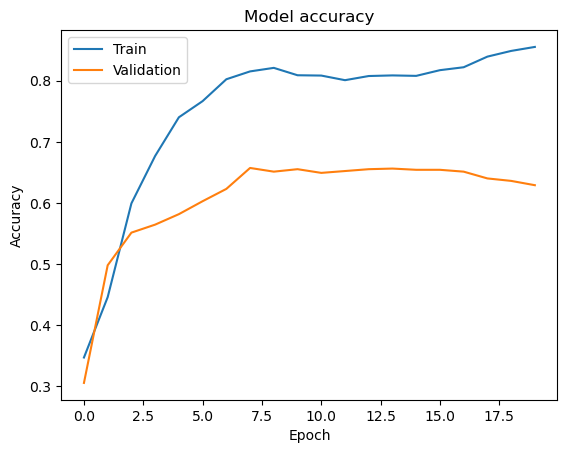

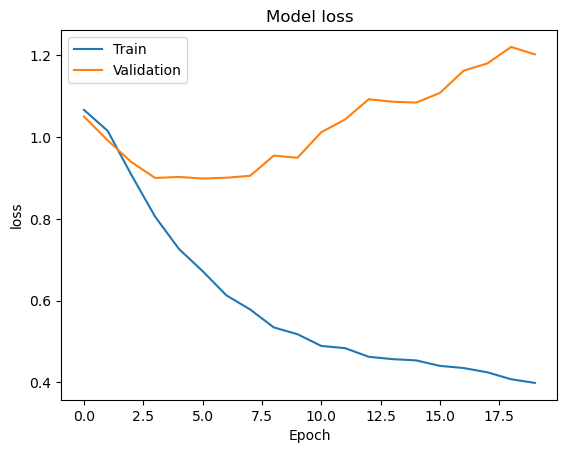

In [20]:
X_train = pad_sequences(X_train,max_length,padding='post')
X_test = pad_sequences(X_test,max_length,padding='post')

RNN = Sequential()
RNN.add(Embedding(input_dim=len(word_index)+1,output_dim=50,input_length=max_length))
RNN.add(SpatialDropout1D(0.3))
RNN.add(Bidirectional(LSTM(10,dropout=0.1,recurrent_dropout=0.1)))
RNN.add(Dropout(0.2))
RNN.add(Dense(1))
RNN.add(Dropout(0.1))
RNN.add(Dense(3,activation='sigmoid'))
RNN.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = RNN.fit(X_train,y_train,batch_size=64,epochs=20,validation_split=0.2)



plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()




plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [13]:
#Bad, but whatever